# P2: Investigate a Dataset

## Varible descriptions for the Dataset:

1. Survival:          Survival (0 = No; 1 = Yes)               
2. Pclass:            Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. Name:              Name
4. Sex:               Sex
5. Age:               Age
6. Sibsp:             Number of Siblings/Spouses Aboard
7. Parch:             Number of Parents/Children Aboard
8. Ticket:            Ticket Number
9. Fare:              Passenger Fare
10. Cabin:            Cabin
11. Embarked:         Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Special Notes:

1. Pclass is a proxy for socio-economic status (SES)
1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
Age is in Years; Fractional if Age less than One (1)

2. If the Age is Estimated, it is in the form xx.5
With respect to the family relation variables (i.e. sibsp and parch
some relations were ignored.  The following are the definitions use
for sibsp and parch.

4. Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

5. Other family relatives excluded from this study include cousins
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

## Question

##### Q. Does the Factor "Pclass" had any effect on the survivals?
* Dependent factors: Survival
* Independent Factors: Pclass, Sex

###### This Data set contains data about the Passengers from the Infameous Ship wrect of the 20th Century "Titanic". We, with the help of the given Dataset, Try to investigate the data and draw conclusions about the factors that Influenced the survival of the Passengers in the tragedic incident. Thought the Dataset can be investigated in many possible ways, I found an interesting question to ask the data if "The passengers rate of survival is dependent on the class of the Passengers(Pclass)?

## Importing Required Data and Packages

In [1]:
import numpy as np
import pandas as pd
import math as math
import scipy as sp
import csv as csv
from matplotlib import pyplot as plt
import seaborn as sb
from IPython.display import display

# importing the Dataset
# original
titanic_default = pd.read_csv('titanic.csv')
# Copy
titanic = titanic_default.copy()

###### Here we import all the necessary packages that might be handfull, Import the Dataset and make a copy of it so that we could do the necessary Data wrangling keeping the Original data untouched. 

## Glance at the Dataset: Titanic

In [2]:
#Get's Information about the Dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


###### A glance of the Dataset: This helps us ave a quick overveiw of the data and discover the insights of the data. This help us decide the integral parts of the data and reliable factor on which we can run an analysis

## Observations

According to the given Dataset, There were a total of 891 Passengers traveling on the ship. The columns like Age, Cabin, Embarked have In-complete data. 

1. The Age column has only 714 entries.

2. Cabin has 204 entries and 

3. Embarked has 889 entries 

Out of a total of 891 entries each. Hence the data in these columns is considered to be Non-Reliable/ Bad-Data/ Missing data and is not used in the Analysis of this Dataset.  


## Cleaning the Data

The Name, Age, Parch, Ticket, Cabin, Embarked columns have been dropped from the dataset as we do not have any considerable use with those columns.

Age, Cabin and Embarked has been dropped as these columns have incomplete or Bad data which is Non-Reliable.

Parch, Name and Ticket column have been dropped as the data in these columns were not utilized in this analysis. Getting rid of  unwanted data makes the code more efficient(It might not make any considerable difference in such small dataset but I believe this is a healthy practice to remove unwanted data from the analysis). Parch, Name and ticket might be key points in the analysis but We assume this data is unwanted as the we are able to answer our questions with the help of remaining data to keep the analysis efficient and the code run quicker.

In [3]:
# Dropping un-necessary columns from the table as the following columns were not used in this Analysis. 
titanic = titanic.drop(["PassengerId", "Name", "Age","Parch", "Ticket", "Cabin", "Embarked"], axis=1)
# Displaying Frist five rows fo the modified data
print display(titanic.head())

,Survived,Pclass,Sex,SibSp,Fare
0,0,3,male,1,7.2500
1,1,1,female,1,71.2833
2,1,3,female,0,7.9250
3,1,1,female,1,53.1000
4,0,3,male,0,8.0500


None


###### The Name, Age, Parch, Ticket, Cabin, Embarked columns have been dropped from the dataset as we do not have any considerable use with those columns.

Age, Cabin and Embarked has been dropped as these columns have incomplete or Bad data which is Non-Reliable.

Parch, Name and Ticket column have been dropped as the data in these columns were not utilized in this analysis. Getting rid of  unwanted data makes the code more efficient(It might not make any considerable difference in such small dataset but I believe this is a healthy practice to remove unwanted data from the analysis). Parch, Name and ticket might be key points in the analysis but We assume this data is unwanted as the we are able to answer our questions with the help of remaining data to keep the analysis efficient and the code run quicker.

# Itiration 1
Q1. Does the Factor "Pclass" had any effect on the survivals?

Dependent factors:Survival

Independent Factors: Pclass, Sex

In [4]:
pclass1 = titanic[titanic.Pclass == int('1')]
pclass2 = titanic[titanic.Pclass == int('2')]
pclass3 = titanic[titanic.Pclass == int('3')]
print display(pclass1.head())
print display(pclass2.head())
print display(pclass3.head())

,Survived,Pclass,Sex,SibSp,Fare
1,1,1,female,1,71.2833
3,1,1,female,1,53.1000
6,0,1,male,0,51.8625
11,1,1,female,0,26.5500
23,1,1,male,0,35.5000


None


,Survived,Pclass,Sex,SibSp,Fare
9,1,2,female,1,30.0708
15,1,2,female,0,16.0000
17,1,2,male,0,13.0000
20,0,2,male,0,26.0000
21,1,2,male,0,13.0000


None


,Survived,Pclass,Sex,SibSp,Fare
0,0,3,male,1,7.2500
2,1,3,female,0,7.9250
4,0,3,male,0,8.0500
5,0,3,male,0,8.4583
7,0,3,male,3,21.0750


None


###### Here we segregate the data based on the Passenger Class they are from and Display the first five rows of the data, Just to have a quick glance.

## Classification of Dataset based on Gender



In [5]:
#The Dataset is classified into Males and Females and is stored
male_Passengers = titanic[titanic.Sex == 'male']
female_Passengers = titanic[titanic.Sex == 'female']

#Total number of Male passengers
print "Total number of males in the Dataset(male_Passengers) %d" %male_Passengers.count()['Sex']

#Total number of Female passengers
print "Total number of females in the Dataset(female_Passengers) %d" %female_Passengers.count()['Sex']

Total number of males in the Dataset(male_Passengers) 577
Total number of females in the Dataset(female_Passengers) 314


###### The Dataset is classified into Males and Females and is stored in seperate tables. Here we also print the total number of males Passengers and Female Passengers in the Dataset  and observe that This adds up to 891, which helps us understand that we have been going in a sensible method.

In [6]:
dead_malePass = male_Passengers[male_Passengers.Survived == int('0')]
print "Total number of dead males in the Dataset(dead_malePass) = %d" %dead_malePass.count()['Sex'] 

dead_femalePass = female_Passengers[female_Passengers.Survived == int('0')]
print "Total number of dead females in the Dataset(dead_femalePass) = %d" %dead_femalePass.count()['Sex'] 

Survived_malePass = male_Passengers[male_Passengers.Survived == int('1')]
print "Total number of Survived females in the Dataset(Survived_malePass) = %d" %Survived_malePass.count()['Sex']

Survived_femalePass = female_Passengers[female_Passengers.Survived == int('1')]
print "Total number of Survived females in the Dataset(Survived_femalePass) = %d" %Survived_femalePass.count()['Sex']



Total number of dead males in the Dataset(dead_malePass) = 468
Total number of dead females in the Dataset(dead_femalePass) = 81
Total number of Survived females in the Dataset(Survived_malePass) = 109
Total number of Survived females in the Dataset(Survived_femalePass) = 233


###### Here we further classify the data into Dead and surived Passengers based on their gender. The output counts of each classifications is printed to have a better understanding of the Data. 

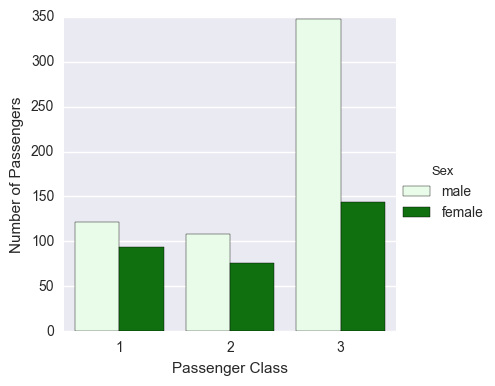

In [7]:
# Histogram of Gender distrubution across each Passenger Class
question1 = sb.factorplot('Pclass',order=[1,2,3], data=titanic, hue='Sex', kind='count', color="g")
question1.set_ylabels("Number of Passengers")
question1.set_xlabels("Passenger Class")
sb.plt.show()


###### This is a Histogram plotted between Number of passsengers(Count) and the passengers classified agianst each Passenger class. As you can see we can assume that there are more number of Passengers from passenger class 3 and Its no surprise that more number of people are dead from  passenger class 3.

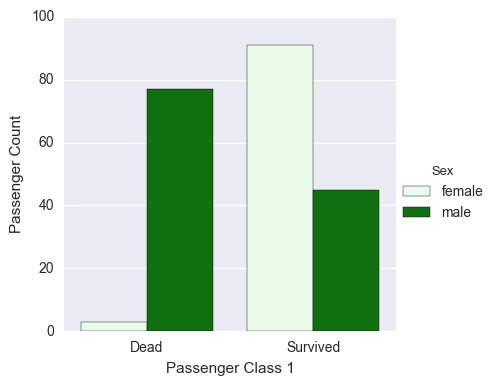

In [8]:
question1a = sb.factorplot('Survived',order=[0,1], data=pclass1, hue='Sex', kind='count', color="g")
(question1a.set_axis_labels('Passenger Class 1', 'Passenger Count').set_xticklabels(['Dead', 'Survived']).set_titles("{col_name}"))
sb.plt.show()

###### This histogram help us visualize the Passenger statistics who are dead and survied in each passenger class based on their gender. Please Note that there are only 3 dead females out of the 94 females from the Pclass1
Note: In the Passenger Class 3 Visualizations, The Male and female Legends were interchanged but the Data representation is done Accurately. 

In [9]:
# This cell gives the Tabulized data of Gender agianst the Survival in each passenger class
titanic['Survival'] = titanic.Survived.map({0 : 'Died', 1 : 'Survived'})
titanic['Class'] = titanic.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
titanic.groupby(['Sex', 'Survival'])['Class'].value_counts().unstack()

Class            First Class  Second Class  Third Class
Sex    Survival                                        
female Died                3             6           72
       Survived           91            70           72
male   Died               77            91          300
       Survived           45            17           47

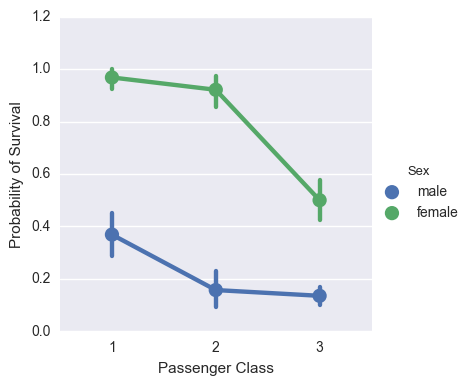

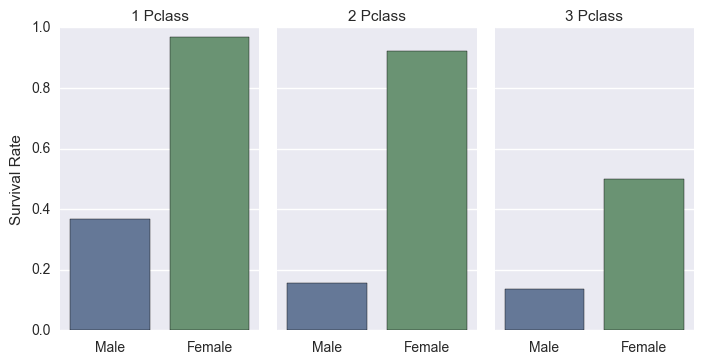

In [10]:
ques1 = sb.factorplot("Pclass", "Survived", data=titanic, order=[1,2,3], hue='Sex', kind='point')
ques1.set_ylabels("Probability of Survival")
ques1.set_xlabels("Passenger Class")
sb.plt.show()

q1 = sb.factorplot(x="Sex", y="Survived", col="Pclass", data=titanic, saturation=.5, kind="bar", ci=None, aspect=.6)
(q1.set_axis_labels("", "Survival Rate").set_xticklabels(["Male", "Female"]).set_titles("{col_name} {col_var}").set(ylim=(0, 1)).despine(left=True))
sb.plt.show()

###### Through this data It can be understood that 38% of the Passengers survived the Incident and the Proportion of female passengers that survived the Incident is 74.2% and its understood that if a female passenger board from Passenger class1, That chance of survival is 96.80%.  

###### As we can see that there are a total of 216 passengers from Pclass1 and only 136. We  use numpy below to calculate the Proportions. 

In [11]:
prop = csv.reader(open('C:\Users\PremMithilesh\Desktop\Udacity DSND\P2\Class Practice\gender.csv', 'rb')) 
header = prop.next() 
Data = [] 
for row in prop: 
    Data.append(row)     
Data = np.array(Data) 
total_passengers = np.size(Data[0::,1].astype(np.float))
total_survived = np.sum(Data[0::,1].astype(np.float))
proportion_survivors = total_survived / total_passengers
print 'The Total proportion of passengers who survived the incident is %s' % proportion_survivors

The Total proportion of passengers who survived the incident is 0.383838383838


In [12]:
femaleStat = Data[0::,4] == "female"
f_surv = Data[femaleStat,1].astype(np.float)
female_prop = np.sum(f_surv) / np.size(f_surv) 
print 'The Total proportion of female passengers that survived the incident is %s' % female_prop

The Total proportion of female passengers that survived the incident is 0.742038216561


In [13]:
pclass1 = Data[0::,2] == "1"
pclass1_surv = Data[pclass1,1].astype(np.float)
prop_pclass1_surv = np.sum(pclass1_surv) / np.size(pclass1_surv)
print 'Thr total proprtion of Passengers survived from Passenger class 1 is %s' % prop_pclass1_surv

Thr total proprtion of Passengers survived from Passenger class 1 is 0.62962962963


#### The above cells uses numpy to calculate the total proportion 

#### Limitations: The essential information required to understand and support the analysis based on the grade rubric is only documented in this notebook. The conclusions were drawn from the Trends of the dataset under Visualizations and Statistical analysis. Some assumptions were made by generalizing the Human tendency and common behaviour.  The DataSet is inappropriate to analyse certain angles as the:
1. The Age column has only 714 entries.
2. Cabin has 204 entries and
3. Embarked has 889 entries
4. This dataset was at least in part collected after the titanic sank. This means that there's significant survivor bias. This is worth noting!
5. It is important to note co-relation does not imply causation. 

## Conclusion:
There are a total of 314 femals and 577 males in the dataset. the Interesting point here is that there are only 3 dead females from Pclass1. which is 96.80% of survival rate. Though this Data it can be implied that the female passengers who boarded in the Passenger Class 1 had a greater chance of survival which is 96.80%. 

## Assumptions:
I assume the reasons for the greater proportion of survival across the Passenger class 1 in females might be due to two reasons. 
1. Pclass 1 Passengers were of the higher class and might be given the high priority as their fare price is considerably higher. The Lifeboats might as well be very accessible to the Pclass 1 Passengers as the higher Price results in higher luxury, Comfort, Priority and safety. 
2. The Women had a Higher proportion of suvival compared to men of passenger class 1 as the women might have been given higher priority. 


## References:
    1. https://seaborn.pydata.org/api.html
    2. https://www.kaggle.com/c/titanic/data